# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df = study_results.merge(mouse_metadata,how="left", on="Mouse ID")

# Display the data table for preview
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_df.loc[study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = study_df.loc[study_df["Mouse ID"] == "g989", :]
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_df.loc[study_df["Mouse ID"] != "g989", :]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_df = clean_df.groupby(["Drug Regimen"])
mean_col = grouped_df["Tumor Volume (mm3)"].mean()
median_col = grouped_df["Tumor Volume (mm3)"].median()
var_col = grouped_df["Tumor Volume (mm3)"].var()
stdev_col = grouped_df["Tumor Volume (mm3)"].std()
ser_col = grouped_df["Tumor Volume (mm3)"].sem()

drug_regimen_df = pd.DataFrame({"Mean Tumor Volume": mean_col,
                               "Median Tumor Volume": median_col,
                               "Tumor Volume Variance": var_col,
                               "Tumor Volume Std. Dev.": stdev_col,
                               "Tumor Volume Std. Err.": ser_col})
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

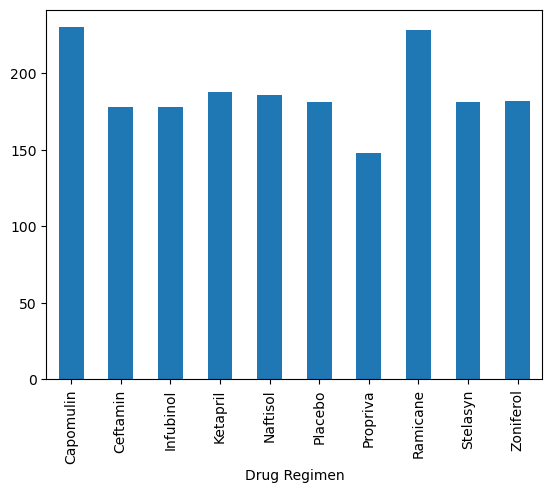

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_df = grouped_df["Timepoint"].count()
timepoint_df.plot(kind = 'bar', x = 'Drug Regimen', y = '# of Observed Mouse Timepoints')
plt.show()

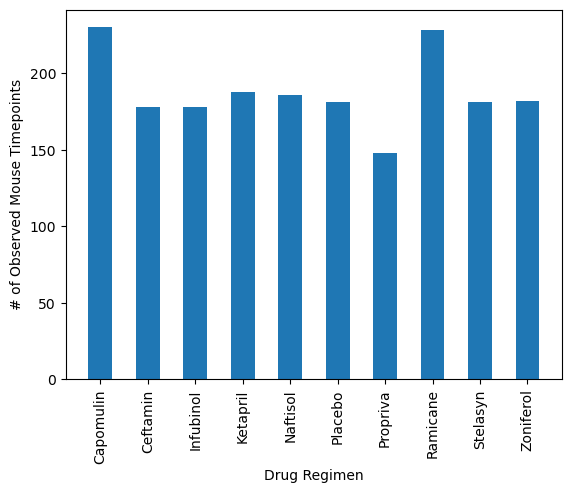

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = grouped_df["Timepoint"].count()
x_axis = drug_regimen_df.index.values
plt.bar(x_axis, y_axis, width=0.5)
plt.xticks(x_axis, rotation="vertical")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")

plt.show()

<Axes: ylabel='Sex'>

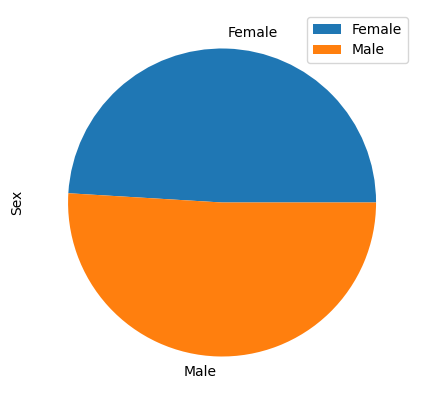

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_count = clean_df.loc[clean_df["Sex"] == "Female", :]
male_count = clean_df.loc[clean_df["Sex"] == "Male", :]
sex_df = pd.DataFrame({'Sex': [len(female_count), len(male_count)]},
                      index=['Female', 'Male'])
sex_df.plot.pie(y='Sex', figsize=(5,5))

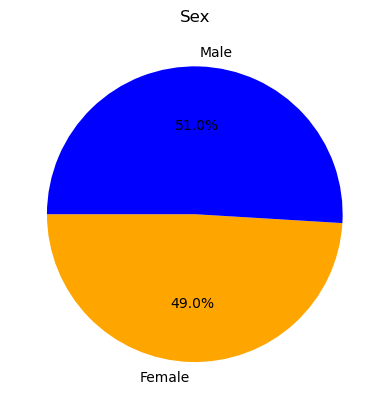

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [len(female_count), len(male_count)]
labels = ["Female", "Male"]
colours = ["orange", "blue"]
plt.pie(sizes, labels=labels, colors=colours, autopct="%1.1f%%", shadow=False, startangle=180)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_timepoint = clean_df.groupby(["Mouse ID"])
timepoint_df = grouped_timepoint["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = clean_df.merge(timepoint_df, how="inner", on="Mouse ID")
merged_df.head(100)

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
95,x930,25,53.726101,0,Naftisol,Male,13,26,25
96,o725,0,45.000000,0,Naftisol,Male,4,26,15
97,o725,5,46.889821,0,Naftisol,Male,4,26,15
98,o725,10,48.199452,0,Naftisol,Male,4,26,15


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lower_bound_list = []
upper_bound_list = []

for treatment in treatments_list:
    quartile_df = merged_df.loc[merged_df["Drug Regimen"] == treatment, :]
    quartiles = quartile_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    lower_bound_list.append(lower_bound)
    upper_bound = upperq + (1.5*iqr)
    upper_bound_list.append(upper_bound)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = merged_df.loc[merged_df["Drug Regimen"] == treatment, :]
    grouped_drug_df = drug_df.groupby(["Mouse ID"])
    max_val_df = grouped_drug_df[["Timepoint_x", "Tumor Volume (mm3)"]].max()
    max_val_list = [val for val in max_val_df["Tumor Volume (mm3)"]]
    tumor_vol_data.append(max_val_list)
    
    # Determine outliers using upper and lower bounds
print(f"Capomulin's potential outliers: values below {lower_bound_list[0]} or values above {upper_bound_list[0]}")
print(f"Ramicane's potential outliers: values below {lower_bound_list[1]} or values above {upper_bound_list[1]}")
print(f"Infubinol's potential outliers: values below {lower_bound_list[2]} or values above {upper_bound_list[2]}")
print(f"Ceftamin's potential outliers: values below {lower_bound_list[3]} or values above {upper_bound_list[3]}")


Capomulin's potential outliers: values below 26.714832162499995 or values above 55.9711007025
Ramicane's potential outliers: values below 24.1865864625 or values above 57.488048122500004
Infubinol's potential outliers: values below 32.309217298749985 or values above 72.31757996875001
Ceftamin's potential outliers: values below 32.81891142624998 or values above 71.19095325625001


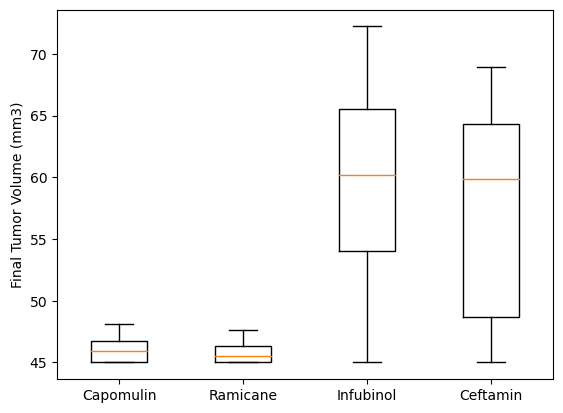

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(treatments_list)
plt.show()

## Line and Scatter Plots

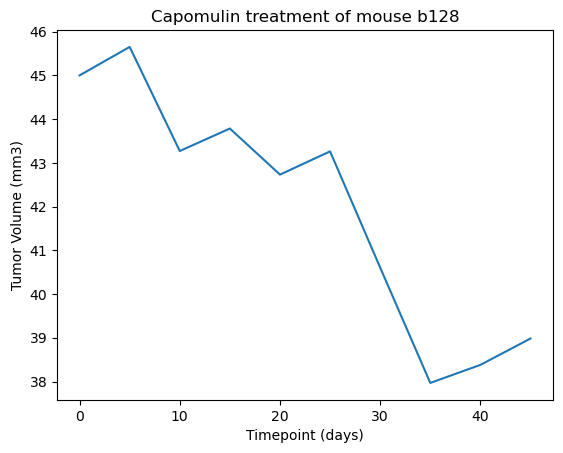

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = merged_df.loc[merged_df["Mouse ID"] == "b128", :]
plt.plot(line_df["Timepoint_x"], line_df["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

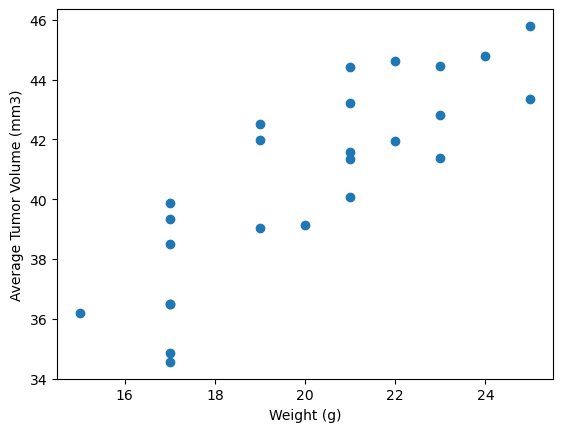

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin", :]
scatter_df = scatter_df.groupby(["Mouse ID"])
scatter_df = scatter_df[["Tumor Volume (mm3)", "Weight (g)"]].mean()
x_axis = scatter_df["Weight (g)"]
y_axis = scatter_df["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.71


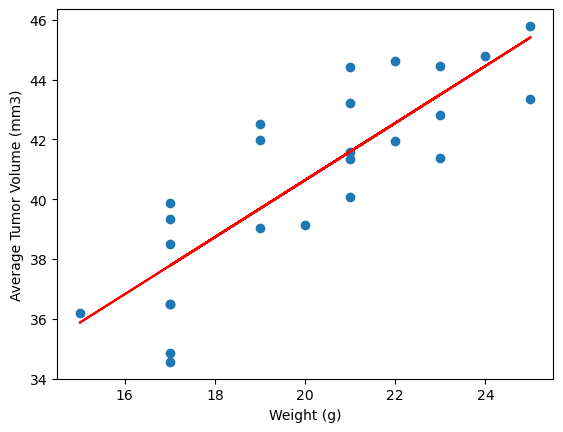

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue**2,2)}")